In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy

In [4]:
nlp = spacy.load("en_core_web_trf")
import en_core_web_trf
nlp = en_core_web_trf.load()

# load text file
with open('Objective_with_time_frame.txt', 'r', encoding='utf8') as file:
    text = file.read().replace('\n', '')

per_country = text.split('Files\\\\')[1:]
countries = [count.split('-')[0][:-1] for count in per_country]

# stopwords
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS

text = []
for count in per_country:
    references = count.split('% Coverage')[2:]
    references_together = ''
    for i,ref in enumerate(references):
        if i != 0:
            if references_together[-1] != '.':
                references_together += '.'
            references_together += ' '
        references_together += ref.split('Reference')[0]
    #remove stopwords
    doc = nlp(references_together)
    cleaned = ''
    for word in doc:
        if word.is_stop==False:
            cleaned+=str(word)
            cleaned += ' '
    text.append(cleaned)

In [5]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(text).toarray()


{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [35.0, 35.0, 52.5, 52.5],
  [75.0, 75.0, 85.0, 85.0],
  [43.75, 43.75, 80.0, 80.0],
  [25.0, 25.0, 61.875, 61.875],
  [95.0, 95.0, 105.0, 105.0],
  [43.4375, 43.4375, 100.0, 100.0],
  [10.0, 10.0, 71.71875, 71.71875]],
 'dcoord': [[0.0, 1.167896144253222, 1.167896144253222, 0.0],
  [0.0, 1.060934159499596, 1.060934159499596, 0.0],
  [0.0, 1.1754876095117317, 1.1754876095117317, 1.060934159499596],
  [0.0, 1.2633387017143933, 1.2633387017143933, 1.1754876095117317],
  [0.0, 1.270362634400268, 1.270362634400268, 0.0],
  [1.2633387017143933,
   1.297357070704736,
   1.297357070704736,
   1.270362634400268],
  [0.0, 1.343202853619585, 1.343202853619585, 1.297357070704736],
  [0.0, 1.370978685893183, 1.370978685893183, 0.0],
  [1.343202853619585, 1.431884486645345, 1.431884486645345, 1.370978685893183],
  [1.167896144253222,
   1.5285940862019756,
   1.5285940862019756,
   1.431884486645345]],
 'iv

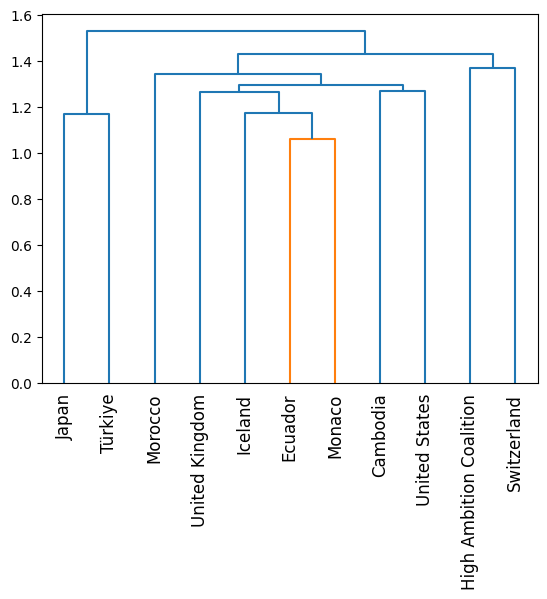

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X, 'ward')
dendrogram(Z, labels=countries, leaf_rotation=90)

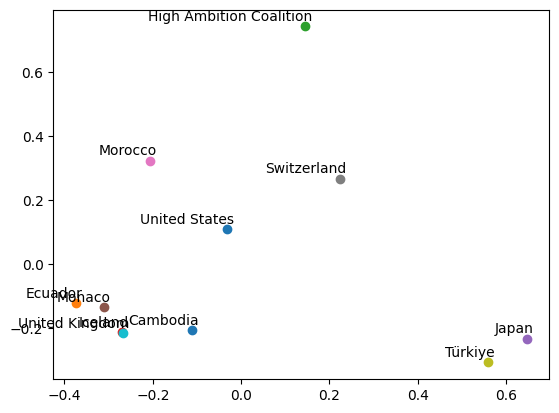

In [9]:
from sklearn.decomposition import PCA
decomposer = PCA(n_components=2)
decomposer.fit(X)
vectors_2d = decomposer.transform(X)

# label each point with its country
for i, country in enumerate(countries):
    x, y = vectors_2d[i, :]
    plt.scatter(x, y)
    plt.annotate(country, xy=(x, y), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom')